# Omri Reindorp 302141874
# Asaf Chananiev 314597485
# Chen gershgoren 316404490

run in terminal: pip install networkx[default]

In [1]:
from Node import Node
import networkx as nx

# support functions:

In [2]:
# Heuristic
def manhattanDistance(i1, j1, i2, j2):
    return abs(i1 - i2) + abs(j1 - j2)

# Move node from open to cloce by i & j
def moveNode(open, closed, i, j):
    for node in open:
        if node.i == i and node.j == j:
            open.remove(node)
            closed.append(node)
            break

# Remove node from list or set by i & j
def discardNode(nodes, i, j):
    for node in nodes:
        if node.i == i and node.j == j:
            nodes.discard(node)
            break

# note
Every function contains 8 if statements inside a seperate try/catch clock represented an operator accordind to the instructions.

# dfs:

In [3]:
def dfsMove(matrix, size, currentNode, pathToReturn, visited, i, j, distanceToAdd):
    nextNode = [node for node in pathToReturn if node.i == i and node.j == j]
    if(not nextNode):
        nextNode = Node(matrix[i][j], i, j, currentNode.distance+distanceToAdd, currentNode)
    else:
        nextNode = nextNode[0]
    if(nextNode.distance > currentNode.distance+1):
        discardNode(pathToReturn, i, j)
        nextNode.parent = currentNode
    visited.add((i,j))
    pathToReturn.add(nextNode)
    dfs(matrix,size,i,j,nextNode,pathToReturn,visited)
    return

def dfs(matrix, size, i=0, j=0, currentNode=Node('S',0,0,0), pathToReturn=set([Node('S',0,0,0)]), visited=set([(0,0)])):
    # down,right operator
    try:
        if( matrix[i+1][j+1]!='X' and matrix[i][j+1]!='X' and matrix[i+1][j]!='X' and i < size-1 and j < size-1 and (i+1,j+1) not in visited):
            dfsMove(matrix,size,currentNode,pathToReturn,visited,i+1,j+1,1)
    except:
        {}
    # down,left operator
    try:
        if(matrix[i+1][j-1] != 'X' and matrix[i+1][j] != 'X' and matrix[i][j-1] != 'X' and i < size-1 and j > 0 and (i+1,j-1) not in visited):
            dfsMove(matrix,size,currentNode,pathToReturn,visited,i+1,j-1,1)
    except:
        {}
    # up,right operator
    try:
        if(matrix[i-1][j+1] != 'X' and matrix[i-1][j] != 'X' and matrix[i][j+1] != 'X' and i > 0 & j < size-1 and (i-1,j+1) not in visited):
            dfsMove(matrix,size,currentNode,pathToReturn,visited,i-1,j+1,1)
    except:
        {}
    # left,up operator
    try:
        if(matrix[i-1][j-1] != 'X' and matrix[i-1][j] != 'X' and matrix[i][j-1] != 'X' and j > 0 & i > 0 and (i-1,j-1) not in visited):
            dfsMove(matrix,size,currentNode,pathToReturn,visited,i-1,j-1,1)
    except:
        {}
    # right operator
    try:
        if(matrix[i][j+1] != 'X' and j < size-1 and (i,j+1) not in visited):
            dfsMove(matrix,size,currentNode,pathToReturn,visited,i,j+1,2)
    except:
        {}    
    # left operator
    try:
        if(matrix[i][j-1] != 'X' and j > 0 and (i,j-1) not in visited):
            dfsMove(matrix,size,currentNode,pathToReturn,visited,i,j-1,2)
    except:
        {}
    # down operator
    try:
        if(matrix[i+1][j] != 'X' and i < size-1 and (i+1,j) not in visited):
            dfsMove(matrix,size,currentNode,pathToReturn,visited,i+1,j,2)
    except:
        {}
    # up operator
    try:
        if(matrix[i-1][j] != 'X' and i > 0 and (i-1,j) not in visited):
            dfsMove(matrix,size,currentNode,pathToReturn,visited,i-1,j,2)
    except:
        {}
    return pathToReturn, visited

# gbfs:

In [4]:
def gbfs(matrix, size):
    open = list([Node('S',0,0,0)])
    closed = list()
    visited = set([(0,0)])
    i = 0
    j = 0
    goalCordinates = (size-1,size-1)
    
    while(len(open) != 0):
        
        # find the Node with the closest manhattan distance to the goal
        currentNode = None
        closestDistance = float('inf')
        for node in open:
            distance = manhattanDistance(node.i, node.j, goalCordinates[0], goalCordinates[1])
            if distance < closestDistance:
                currentNode = node
                closestDistance = distance

        # move the current node from open to closed
        moveNode(open, closed, i, j)
        i = currentNode.i
        j = currentNode.j

        # down,right operator
        try:
            if( matrix[i+1][j+1]!='X' and matrix[i][j+1]!='X' and matrix[i+1][j]!='X' and i < size-1 and j < size-1 and (i+1,j+1) not in visited):
                open.append(Node(matrix[i+1][j+1], i+1, j+1, currentNode.distance+1, currentNode))
                visited.add((i+1,j+1))
        except:
            {}
         # down,left operator
        try:
            if(matrix[i+1][j-1] != 'X' and matrix[i+1][j] != 'X' and matrix[i][j-1] != 'X' and i < size-1 and j > 0 and (i+1,j-1) not in visited):
                open.append(Node(matrix[i+1][j-1], i+1, j-1, currentNode.distance+1, currentNode))
                visited.add((i+1,j-1))
        except:
            {}
        # up,right operator
        try:
            if(matrix[i-1][j+1] != 'X' and matrix[i-1][j] != 'X' and matrix[i][j+1] != 'X' and i > 0 & j < size-1 and (i-1,j+1) not in visited):
                open.append(Node(matrix[i-1][j+1], i-1, j+1, currentNode.distance+1, currentNode))
                visited.add((i-1,j+1))
        except:
            {}
         # left,up operator
        try:
            if(matrix[i-1][j-1] != 'X' and matrix[i-1][j] != 'X' and matrix[i][j-1] != 'X' and j > 0 & i > 0 and (i-1,j-1) not in visited):
                open.append(Node(matrix[i-1][j-1], i-1, j-1, currentNode.distance+1, currentNode))
                visited.add((i-1,j-1))
        except:
            {}
        # right operator
        try:
            if(matrix[i][j+1] != 'X' and j < size-1 and (i,j+1) not in visited):
                open.append(Node(matrix[i][j+1], i, j+1, currentNode.distance+2, currentNode))
                visited.add((i,j+1))
        except:
            {}    
        # left operator
        try:
            if(matrix[i][j-1] != 'X' and j > 0 and (i,j-1) not in visited):
                open.append(Node(matrix[i][j-1], i, j-1, currentNode.distance+2, currentNode))
                visited.add((i,j-1))
        except:
            {}
        # down operator
        try:
            if(matrix[i+1][j] != 'X' and i < size-1 and (i+1,j) not in visited):
                open.append(Node(matrix[i+1][j], i+1, j, currentNode.distance+2, currentNode))
                visited.add((i+1,j))
        except:
            {}
        # up operator
        try:
            if(matrix[i-1][j] != 'X' and i > 0 and (i-1,j) not in visited):
                open.append(Node(matrix[i-1][j], i-1, j, currentNode.distance+2, currentNode))
                visited.add((i-1,j))
        except:
            {}
    # end of while loop
    return closed, visited 

# A*:

In [5]:
def aStarMove(matrix, size, open, closed, currentNode, visited, i, j, distanceToAdd):
    nextNode = [node for node in closed if node.i == i and node.j == j]
    if(not nextNode):
        nextNode = Node(matrix[i][j], i, j, currentNode.distance+distanceToAdd, currentNode)
    else:
        nextNode = nextNode[0]
    if(nextNode.distance + manhattanDistance(nextNode.i,nextNode.j,size-1,size-1) > currentNode.distance+1+manhattanDistance(currentNode.i,currentNode.j,size-1,size-1)):
        discardNode(open, i, j)
        nextNode.parent = currentNode
    open.append(nextNode)
    visited.add((i,j))
    return

def aStar(matrix, size):
    open = list([Node('S',0,0,0)])
    closed = list()
    visited = set([(0,0)])
    
    while(len(open) != 0):
        
        # find the Node with the minimum value of total distance from the start
        # pluse the  heuristic value as manhattan distance
        currentNode = None
        closestDistance = float('inf')
        for node in open:
            manDistance = manhattanDistance(node.i, node.j, size-1, size-1)
            distance =  manDistance + node.distance
            if distance < closestDistance:
                currentNode = node
                closestDistance = distance
        i = currentNode.i
        j = currentNode.j

        # down,right operator
        try:
            if( matrix[i+1][j+1]!='X' and matrix[i][j+1]!='X' and matrix[i+1][j]!='X' and i < size-1 and j < size-1 and (i+1,j+1) not in visited):
                aStarMove(matrix,size,open,closed,currentNode,visited,i+1,j+1,1)
        except:
            {}
         # down,left operator
        try:
            if(matrix[i+1][j-1] != 'X' and matrix[i+1][j] != 'X' and matrix[i][j-1] != 'X' and i < size-1 and j > 0 and (i+1,j-1) not in visited):
                aStarMove(matrix,size,open,closed,currentNode,visited,i+1,j-1,1)
        except:
            {}
        # up,right operator
        try:
            if(matrix[i-1][j+1] != 'X' and matrix[i-1][j] != 'X' and matrix[i][j+1] != 'X' and i > 0 & j < size-1 and (i-1,j+1) not in visited):
                aStarMove(matrix,size,open,closed,currentNode,visited,i-1,j+1,1)
        except:
            {}
         # left,up operator
        try:
            if(matrix[i-1][j-1] != 'X' and matrix[i-1][j] != 'X' and matrix[i][j-1] != 'X' and j > 0 & i > 0 and (i-1,j-1) not in visited):
                aStarMove(matrix,size,open,closed,currentNode,visited,i-1,j-1,1)
        except:
            {}
        # right operator
        try:
            if(matrix[i][j+1] != 'X' and j < size-1 and (i,j+1) not in visited):
                aStarMove(matrix,size,open,closed,currentNode,visited,i,j+1,2)
        except:
            {}    
        # left operator
        try:
            if(matrix[i][j-1] != 'X' and j > 0 and (i,j-1) not in visited):
                aStarMove(matrix,size,open,closed,currentNode,visited,i,j-1,2)
        except:
            {}
        # down operator
        try:
            if(matrix[i+1][j] != 'X' and i < size-1 and (i+1,j) not in visited):
                aStarMove(matrix,size,open,closed,currentNode,visited,i+1,j,2)
        except:
            {}
        # up operator
        try:
            if(matrix[i-1][j] != 'X' and i > 0 and (i-1,j) not in visited):
                aStarMove(matrix,size,open,closed,currentNode,visited,i-1,j,2)
        except:
            {}
        # move the current node from open to closed
        moveNode(open, closed, i, j)
    # end of while loop
    return closed, visited

# Main code
This block will call one of the algorithems above acording to the first number on "input.txt"<br/>
It will display the graph of routes to all cells that are reacable from 'S' 

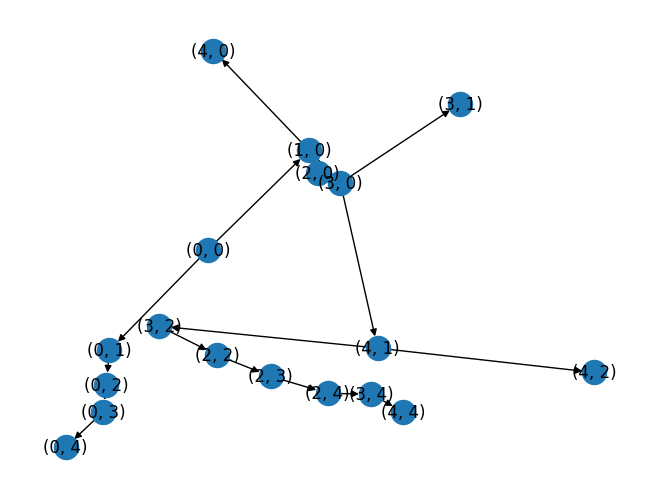

In [8]:

with open('input.txt', 'r') as file:
    # read the first line and convert to integer
    algorithmNum = int(file.readline().strip())
    
    # read the second line and convert to integer
    size = int(file.readline().strip())
    
    # create an empty matrix
    matrix = []
    
    # read the rest of the lines and append each row as a list to the matrix
    for line in file:
        matrix.append(list(line.strip()))

if(algorithmNum == 1):
    nodes, visited = dfs(matrix,size)
elif(algorithmNum == 2):
    nodes, visited = gbfs(matrix,size)
elif(algorithmNum == 3):
    nodes, visited = aStar(matrix,size)
    
nodeList = list(nodes)
#print(visited)
edges = [((node.parent.i,node.parent.j),(node.i,node.j)) for node in nodeList if node.parent]
#print(edges)
G = nx.DiGraph()
G.add_nodes_from(visited)
G.add_edges_from(edges)
nx.draw(G, with_labels=True)


# Output:
this cell will print the path from 'S' to 'G' and the total distance ofthe path

In [7]:
goalNode = [node for node in nodes if node.cell == 'G']
goalNode = goalNode[0]

totalDistance = goalNode.distance
path = ''

while(goalNode != None):
    path = ' => ' + '(' + str(goalNode.i) + ',' + str(goalNode.j) + ')' + path
    goalNode = goalNode.parent


print('Path: ' + path)
print('Total distance: ' + str(totalDistance))

Path:  => (0,0) => (1,0) => (2,0) => (3,0) => (4,1) => (3,2) => (2,2) => (2,3) => (2,4) => (3,4) => (4,4)
Total distance: 18
